In [1]:
import tensorflow as tf
from IPython.display import Image
 

//anaconda2/envs/tensorflow/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


# Logistic Regression - Binary classification

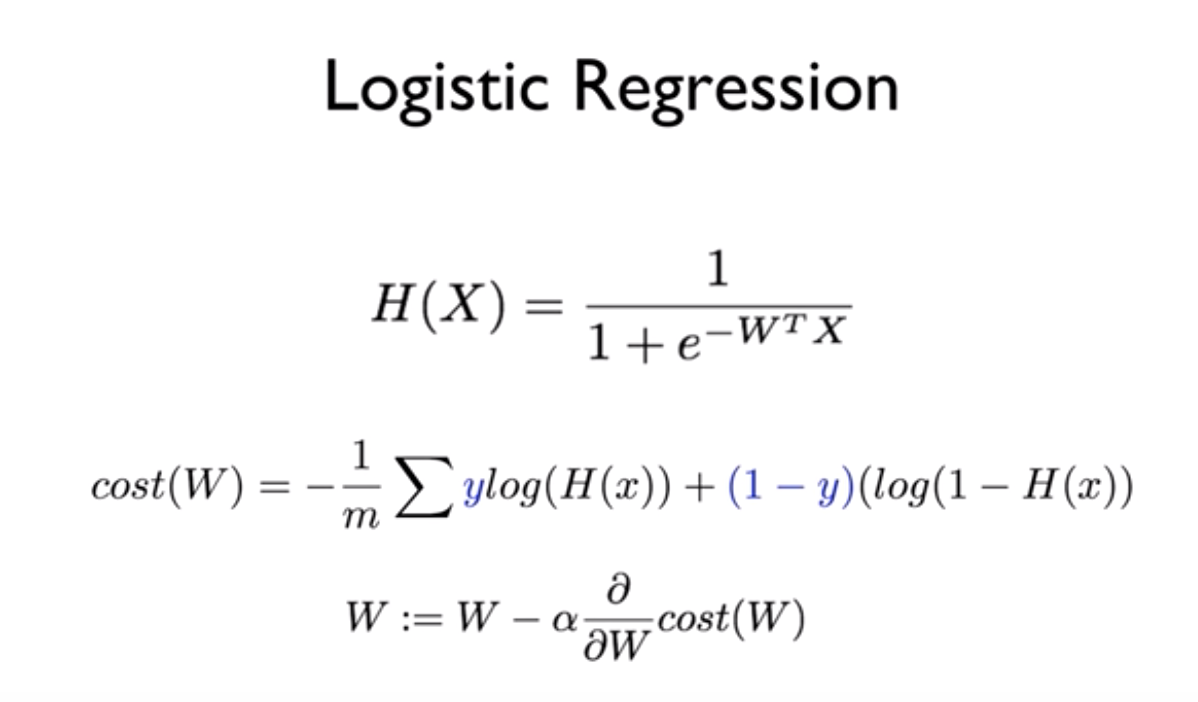

In [2]:
Image("img/TF_logistic_regression.png") # code안에서 나오게 할 때

In [3]:

tf.set_random_seed(777)  # for reproducibility
##        x1, x2
x_data = [[1, 2],
          [2, 3],
          [3, 1],
          [4, 3],
          [5, 3],
          [6, 2]]

##         y - binary classification
y_data = [[0],
          [0],
          [0],
          [1],
          [1],
          [1]]

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 2])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([2, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)


0 1.7307833
200 0.5715119
400 0.5074139
600 0.4718242
800 0.44758478
1000 0.42857108
1200 0.41232464
1400 0.39775506
1600 0.38433787
1800 0.37180105
2000 0.35999325
2200 0.34882215
2400 0.33822623
2600 0.32816052
2800 0.31858906
3000 0.30948088
3200 0.30080852
3400 0.29254702
3600 0.28467283
3800 0.27716395
4000 0.2699997
4200 0.26316056
4400 0.2566281
4600 0.2503851
4800 0.24441504
5000 0.23870273
5200 0.23323363
5400 0.22799431
5600 0.22297198
5800 0.21815477
6000 0.21353154
6200 0.20909168
6400 0.20482557
6600 0.20072372
6800 0.1967777
7000 0.19297928
7200 0.18932094
7400 0.18579553
7600 0.18239634
7800 0.17911713
8000 0.17595184
8200 0.17289506
8400 0.16994144
8600 0.16708624
8800 0.16432472
9000 0.16165248
9200 0.15906551
9400 0.1565599
9600 0.15413192
9800 0.15177831
10000 0.14949557

Hypothesis:  [[0.03074028]
 [0.15884678]
 [0.30486736]
 [0.78138196]
 [0.93957496]
 [0.9801688 ]] 
Correct (Y):  [[0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]] 
Accuracy:  1.0


## Classifying diabetes

In [5]:
import tensorflow as tf
import numpy as np
tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('data/data-03-diabetes.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print(x_data.shape, y_data.shape)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 8])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([8, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis using sigmoid: tf.div(1., 1. + tf.exp(-tf.matmul(X, W)))
hypothesis = tf.sigmoid(tf.matmul(X, W) + b)

# cost/loss function
cost = -tf.reduce_mean(Y * tf.log(hypothesis) + (1 - Y) *
                       tf.log(1 - hypothesis))

train = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Accuracy computation
# True if hypothesis>0.5 else False
predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, Y), dtype=tf.float32))

# Launch graph
with tf.Session() as sess:
    # Initialize TensorFlow variables
    sess.run(tf.global_variables_initializer())

    for step in range(10001):
        cost_val, _ = sess.run([cost, train], feed_dict={X: x_data, Y: y_data})
        if step % 200 == 0:
            print(step, cost_val)

    # Accuracy report
    h, c, a = sess.run([hypothesis, predicted, accuracy],
                       feed_dict={X: x_data, Y: y_data})
    print("\nHypothesis: ", h, "\nCorrect (Y): ", c, "\nAccuracy: ", a)

(759, 8) (759, 1)
0 0.9742218
200 0.73380584
400 0.6805429
600 0.65738314
800 0.640506
1000 0.6259895
1200 0.6130378
1400 0.6013964
1600 0.59091467
1800 0.58146954
2000 0.57295156
2200 0.5652617
2400 0.5583116
2600 0.55202144
2800 0.54632044
3000 0.5411451
3200 0.53643954
3400 0.5321536
3600 0.5282433
3800 0.5246693
4000 0.5213968
4200 0.5183954
4400 0.5156375
4600 0.5130991
4800 0.5107587
5000 0.50859725
5200 0.5065978
5400 0.50474524
5600 0.5030261
5800 0.50142837
6000 0.49994123
6200 0.4985551
6400 0.49726114
6600 0.49605194
6800 0.49492022
7000 0.49385956
7200 0.49286464
7400 0.49193004
7600 0.49105117
7800 0.4902238
8000 0.48944402
8200 0.48870835
8400 0.48801363
8600 0.487357
8800 0.48673567
9000 0.4861472
9200 0.4855895
9400 0.48506045
9600 0.4845582
9800 0.4840809
10000 0.48362702

Hypothesis:  [[0.37003183]
 [0.9154805 ]
 [0.21602729]
 [0.9483494 ]
 [0.08354768]
 [0.7647524 ]
 [0.94660914]
 [0.6240098 ]
 [0.24575189]
 [0.53068644]
 [0.70052207]
 [0.17214665]
 [0.16543272]
 [0.